### <a> <center> EDA Flight Prices </center> </a>
 Welcome to this project for detecting the flights prices and in this Project i will me performing the Exploratory Data Analysis on each and every colums for the flights prices data, and later will try to put up the data to test foe the same and will try to rum some machine learning alogrithms just to predict the missing prices for the Arilines 

In [57]:
#loading the needed liberaies 

import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("Flight_Price.csv")
data.head(3)

df = data.copy()
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.shape

(10683, 11)

In [4]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace = True)
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [5]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [6]:
# As obsereved , it would be hard to work on the Date of journey colum if it's in dd/mm/yyyy formate, 
#so i will split in 3 diff colums
# Separate "Date_of_Journey" into day, month, and year
df[['J_Day', 'J_Month', 'J_Year']] = df['Date_of_Journey'].str.split('/', expand=True)

# Convert the new columns to numeric
df[['J_Day', 'J_Month', 'J_Year']] = df[['J_Day', 'J_Month', 'J_Year']].astype(int)

# Drop the original "Date_of_Journey" column
df.drop('Date_of_Journey', axis=1, inplace=True)

# Display the DataFrame after separating the columns

df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,J_Day,J_Month,J_Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,2019


In [7]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,J_Day,J_Month,J_Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,2019


In [8]:
#As "Arrival_Time" also has the Arrival date in it.
#i will sapetate them 
# Convert 'Arrival_Time' column to datetime format
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%I:%M %d %b', errors='coerce')
#df.head(2)
# Create new columns for arrival date and arrival time
df['Arrival_Date'] = df['Arrival_Time'].dt.date
df['Arrival_Time'] = df['Arrival_Time'].dt.time
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,J_Day,J_Month,J_Year,Arrival_Date
0,IndiGo,Banglore,New Delhi,22:20,01:10:00,2h 50m,non-stop,3897,24,3,2019,1900-03-22
1,Air India,Kolkata,Banglore,05:50,NaT,7h 25m,2 stops,7662,1,5,2019,NaT


In [9]:
df.drop('Arrival_Date', axis = 1, inplace  = True ) 
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,J_Day,J_Month,J_Year
0,IndiGo,Banglore,New Delhi,22:20,01:10:00,2h 50m,non-stop,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,NaT,7h 25m,2 stops,7662,1,5,2019


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10683 non-null  object
 1   Source        10683 non-null  object
 2   Destination   10683 non-null  object
 3   Dep_Time      10683 non-null  object
 4   Arrival_Time  2891 non-null   object
 5   Duration      10683 non-null  object
 6   Total_Stops   10682 non-null  object
 7   Price         10683 non-null  int64 
 8   J_Day         10683 non-null  int32 
 9   J_Month       10683 non-null  int32 
 10  J_Year        10683 non-null  int32 
dtypes: int32(3), int64(1), object(7)
memory usage: 793.0+ KB


##### Checking each colum, if ther are any missing values. #####

In [11]:
df['Airline'].isnull().sum()

0

In [12]:
df['Source'].isnull().sum()

0

In [13]:
df['Destination'].isnull().sum()

0

In [14]:
df['Dep_Time'].isnull().sum()

0

In [15]:
#Saperate the Departure time into HRs and Mins differently


In [16]:
#Airlines Arival times showes the maximum missing values 
df['Arrival_Time'].isnull().sum()
#So, out of 10,683 values we have "7792" values missing, there is no where where we can fill them and get the appriximate 
#values, hence i shall drop that too 

7792

In [17]:
df.drop("Arrival_Time", axis =1, inplace =True)
df.head(2)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,J_Day,J_Month,J_Year
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,1,5,2019


In [18]:
# to separate the 'Dep_Time' column into two separate columns for hours and minutes,
# Assuming df is your DataFrame
# Convert 'Dep_Time' to datetime format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M', errors='coerce')

# Extract 'Dep_Hour' and 'Dep_Minute'
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute

# Drop the original 'Dep_Time' column
#df.drop('Dep_Time', axis=1, inplace=True)



In [19]:
df.head(3)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,1900-01-01 22:20:00,2h 50m,non-stop,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,1900-01-01 05:50:00,7h 25m,2 stops,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,1900-01-01 09:25:00,19h,2 stops,13882,9,6,2019,9,25


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Airline      10683 non-null  object        
 1   Source       10683 non-null  object        
 2   Destination  10683 non-null  object        
 3   Dep_Time     10683 non-null  datetime64[ns]
 4   Duration     10683 non-null  object        
 5   Total_Stops  10682 non-null  object        
 6   Price        10683 non-null  int64         
 7   J_Day        10683 non-null  int32         
 8   J_Month      10683 non-null  int32         
 9   J_Year       10683 non-null  int32         
 10  Dep_Hour     10683 non-null  int64         
 11  Dep_Minute   10683 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(3), object(5)
memory usage: 876.5+ KB


In [21]:
df['Duration'].isnull().sum()
#But i notice that the duration is in hrs and mins , i should be solving that and getting them into saperate colums ,

0

In [22]:
data['Duration_Copy'] = df['Duration'].copy()



df.head(3)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,1900-01-01 22:20:00,2h 50m,non-stop,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,1900-01-01 05:50:00,7h 25m,2 stops,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,1900-01-01 09:25:00,19h,2 stops,13882,9,6,2019,9,25


In [23]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,1900-01-01 22:20:00,2h 50m,non-stop,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,1900-01-01 05:50:00,7h 25m,2 stops,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,1900-01-01 09:25:00,19h,2 stops,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,1900-01-01 18:05:00,5h 25m,1 stop,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,1900-01-01 16:50:00,4h 45m,1 stop,13302,1,3,2019,16,50


In [31]:
data['Duration'] = df['Duration'].copy()
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,1900-01-01 22:20:00,1900-01-01 02:50:00,non-stop,3897,24,3,2019,22,20,2.0,50.0
1,Air India,Kolkata,Banglore,1900-01-01 05:50:00,1900-01-01 07:25:00,2 stops,7662,1,5,2019,5,50,7.0,25.0
2,Jet Airways,Delhi,Cochin,1900-01-01 09:25:00,NaT,2 stops,13882,9,6,2019,9,25,NaN,NaN
3,IndiGo,Kolkata,Banglore,1900-01-01 18:05:00,1900-01-01 05:25:00,1 stop,6218,12,5,2019,18,5,5.0,25.0
4,IndiGo,Banglore,New Delhi,1900-01-01 16:50:00,1900-01-01 04:45:00,1 stop,13302,1,3,2019,16,50,4.0,45.0


In [25]:

# Assuming df is your DataFrame
# Convert 'Duration' to datetime format (assuming format is 'hh:mm')
df['Duration'] = pd.to_datetime(df['Duration'], format='%Hh %Mm', errors='coerce')

# Extract 'Duration_Hour' and 'Duration_Minute'
df['Duration_Hour'] = df['Duration'].dt.hour
df['Duration_Minute'] = df['Duration'].dt.minute

# Display the DataFrame after processing 'Duration'
print("\nDataFrame after processing 'Duration' column:")
print(df.head())



DataFrame after processing 'Duration' column:
       Airline    Source Destination            Dep_Time            Duration  \
0       IndiGo  Banglore   New Delhi 1900-01-01 22:20:00 1900-01-01 02:50:00   
1    Air India   Kolkata    Banglore 1900-01-01 05:50:00 1900-01-01 07:25:00   
2  Jet Airways     Delhi      Cochin 1900-01-01 09:25:00                 NaT   
3       IndiGo   Kolkata    Banglore 1900-01-01 18:05:00 1900-01-01 05:25:00   
4       IndiGo  Banglore   New Delhi 1900-01-01 16:50:00 1900-01-01 04:45:00   

  Total_Stops  Price  J_Day  J_Month  J_Year  Dep_Hour  Dep_Minute  \
0    non-stop   3897     24        3    2019        22          20   
1     2 stops   7662      1        5    2019         5          50   
2     2 stops  13882      9        6    2019         9          25   
3      1 stop   6218     12        5    2019        18           5   
4      1 stop  13302      1        3    2019        16          50   

   Duration_Hour  Duration_Minute  
0            2.

In [34]:
df.drop("Duration",axis =1, inplace = True)

In [36]:
df.drop("Dep_Time",axis =1, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,2.0,50.0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,7.0,25.0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,NaN,NaN
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,5.0,25.0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,4.0,45.0


In [41]:
#Now let's fix the Missing values in the Newly formed colums 
# Calculate the mean of 'Duration_Hour'
mean_duration_hour = df['Duration_Hour'].mean()

# Fill missing values in 'Duration_Hour' with the mean
df['Duration_Hour'].fillna(mean_duration_hour, inplace=True)


In [42]:
df.head(4)

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,2.000000,50.0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,7.000000,25.0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,8.178196,NaN
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,5.000000,25.0


In [45]:
df['Duration_Hour'] = df['Duration_Hour'].astype(int)

In [46]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,2,50.0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,7,25.0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,8,NaN


In [47]:
#now doing the same with Duration_Minutes
mean_duration_min = df['Duration_Minute'].mean()

# Fill missing values in 'Duration_Hour' with the mean
df['Duration_Minute'].fillna(mean_duration_hour, inplace=True)
#to integers 
df['Duration_Minute'] = df['Duration_Minute'].astype(int)

df.head(3)

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,8,8


In [48]:
#now doing the same with Dep_Hour
mean_duration_min = df['Dep_Hour'].mean()

# Fill missing values in 'Duration_Hour' with the mean
df['Dep_Hour'].fillna(mean_duration_hour, inplace=True)
#to integers 
df['Dep_Hour'] = df['Dep_Hour'].astype(int)

df.head(3)

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,8,8


In [52]:
#Now doing the same for the Dep_Min
#now doing the same with Duration_Minutes
mean_duration_min = df['Dep_Minute'].mean()

# Fill missing values in 'Duration_Hour' with the mean
df['Dep_Minute'].fillna(mean_duration_hour, inplace=True)
#to integers 
df['Dep_Minute'] = df['Dep_Minute'].astype(int)

df.head(3)

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,8,8


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Price            10683 non-null  int64 
 5   J_Day            10683 non-null  int32 
 6   J_Month          10683 non-null  int32 
 7   J_Year           10683 non-null  int32 
 8   Dep_Hour         10683 non-null  int32 
 9   Dep_Minute       10683 non-null  int32 
 10  Duration_Hour    10683 non-null  int32 
 11  Duration_Minute  10683 non-null  int32 
dtypes: int32(7), int64(1), object(4)
memory usage: 709.5+ KB


In [55]:
data['Price'].isnull().sum()

0

In [56]:
df.head(
)

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,8,8
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,4,45


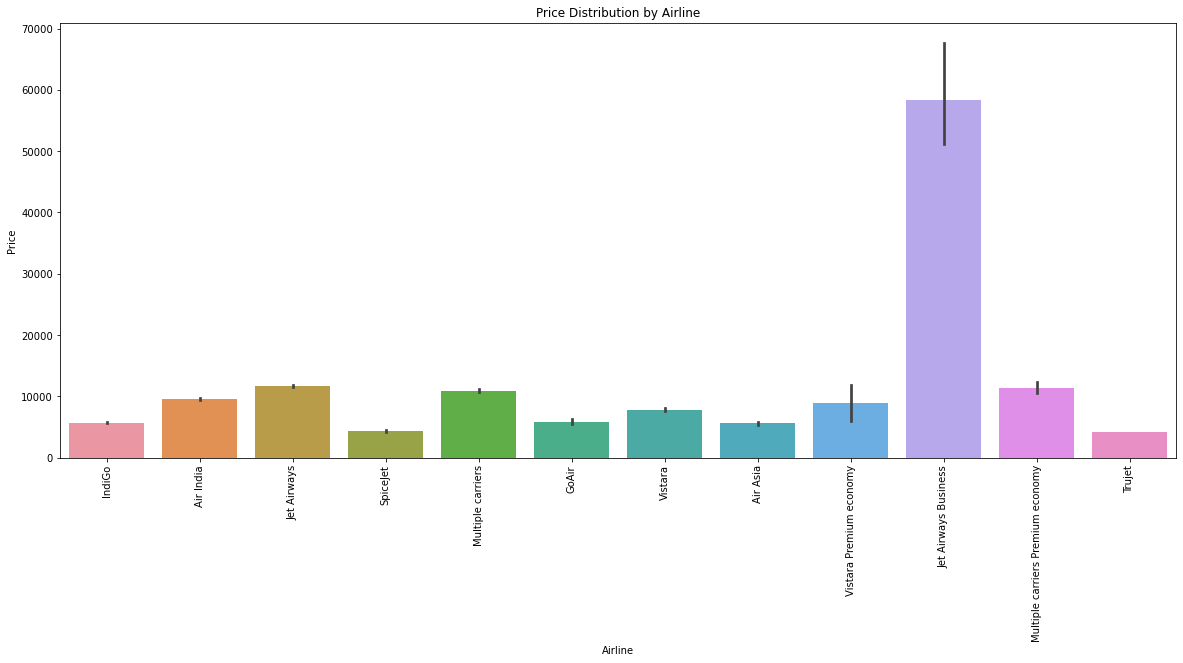

In [62]:
#Visualizing the Prices for different Airlines 
plt.figure(figsize=(20, 8))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Price Distribution by Airline')
plt.xticks(rotation=90)
plt.show()

-  It's clearly visible that the 'Vistara Primium Economy' is costed the highest about all the other Airlines
-  And the cheapest would be 'TruJet' compared to all the others. 
** But my doubt would be , how would this be based onthe Timing and durations **

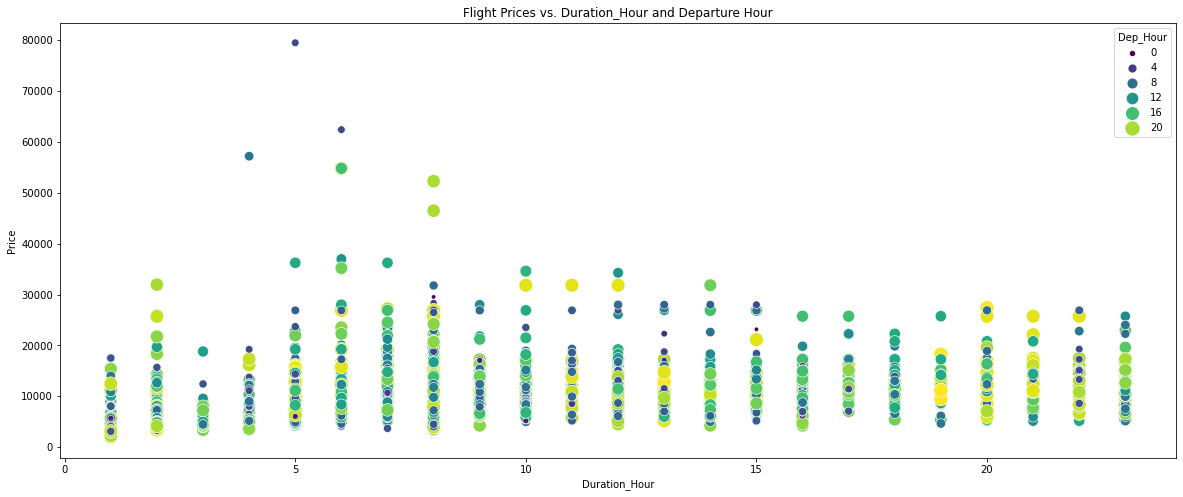

In [63]:
#TO check the visualization based on the Departure time and the duration of the flight 

# Assuming df is your DataFrame
plt.figure(figsize=(20, 8))

# Scatter plot of Duration_Hour vs. Price with color-coded points based on Dep_Hour
sns.scatterplot(x='Duration_Hour', y='Price', hue='Dep_Hour', data=df, palette='viridis', size='Dep_Hour', sizes=(20, 200))
plt.title('Flight Prices vs. Duration_Hour and Departure Hour')
plt.xlabel('Duration_Hour')
plt.ylabel('Price')
plt.show()


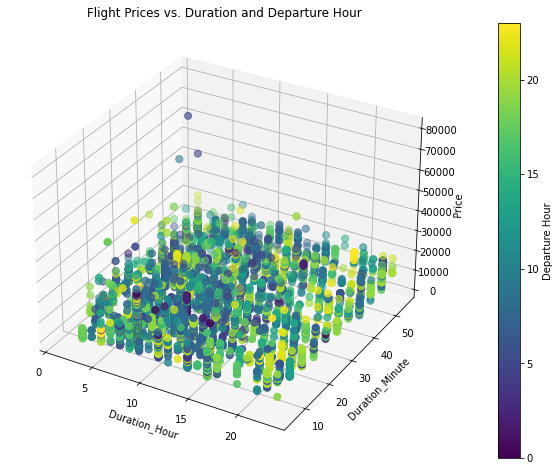

In [64]:
# Assuming df is your DataFrame
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of Duration_Hour, Duration_Minute, and Price with color-coded points based on Dep_Hour
scatter = ax.scatter(df['Duration_Hour'], df['Duration_Minute'], df['Price'], c=df['Dep_Hour'], cmap='viridis', s=50)
ax.set_xlabel('Duration_Hour')
ax.set_ylabel('Duration_Minute')
ax.set_zlabel('Price')
ax.set_title('Flight Prices vs. Duration and Departure Hour')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Departure Hour')

plt.show()

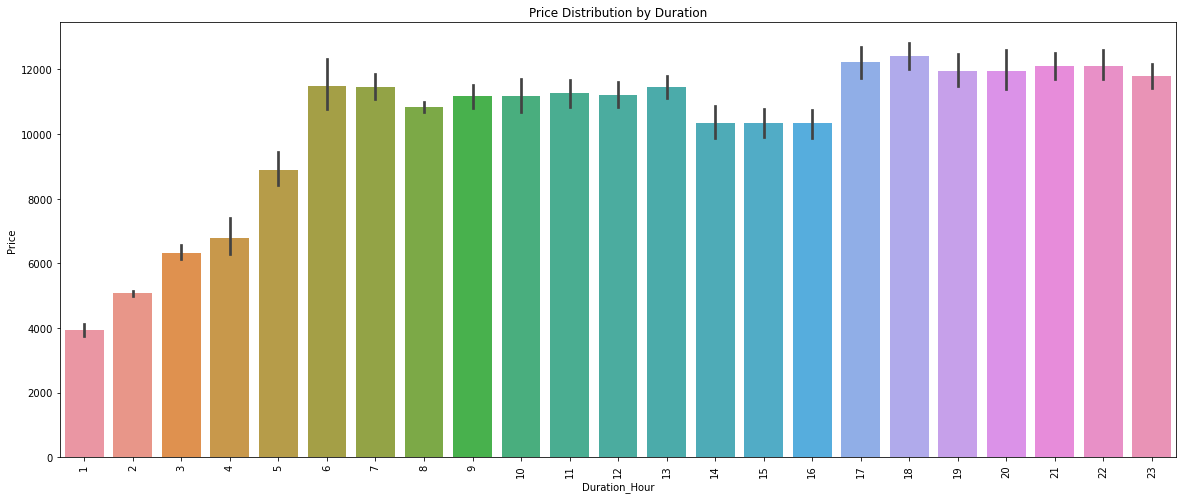

In [65]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Duration_Hour', y='Price', data=df)
plt.title('Price Distribution by Duration')
plt.xticks(rotation=90)
plt.show()

-  Based on these many Visualization , i can say that the Early hrours flights are cheaper then the day time flights, 
-  The the most expensive would the Peak Hr flights, like from 5:00 PM till almost 9:00 PM

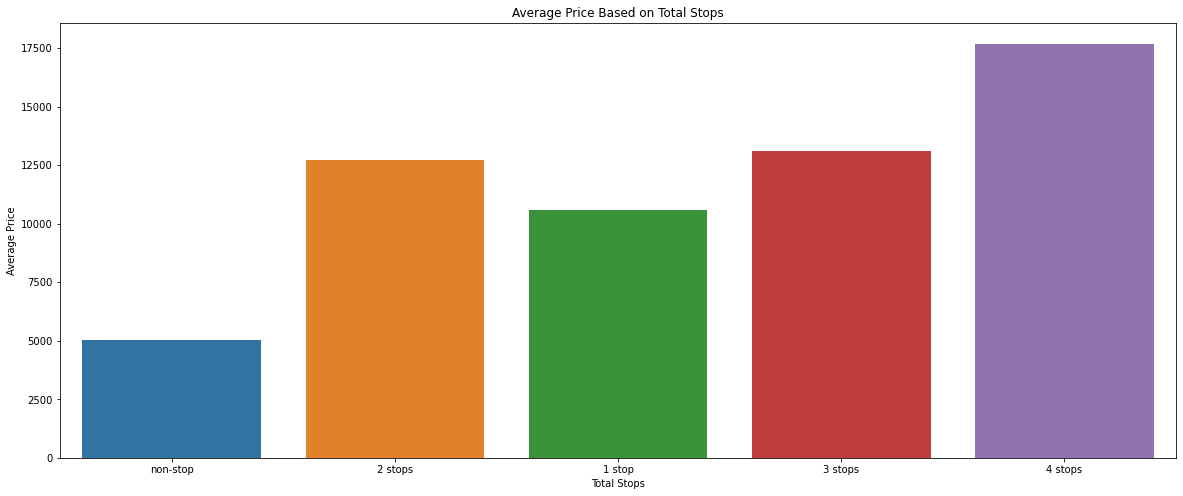

In [66]:
#The prices may definetly vary based on the Total number of Stops , let's ee 
plt.figure(figsize=(20, 8))

# Bar chart of average price by Total_Stops
sns.barplot(x='Total_Stops', y='Price', data=df, ci=None)
plt.title('Average Price Based on Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Price')
plt.show()

- This is Strange,
**The flights that are NON-stop are cheaper then the flights that have more number of stops

In [67]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,8,8
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,4,45


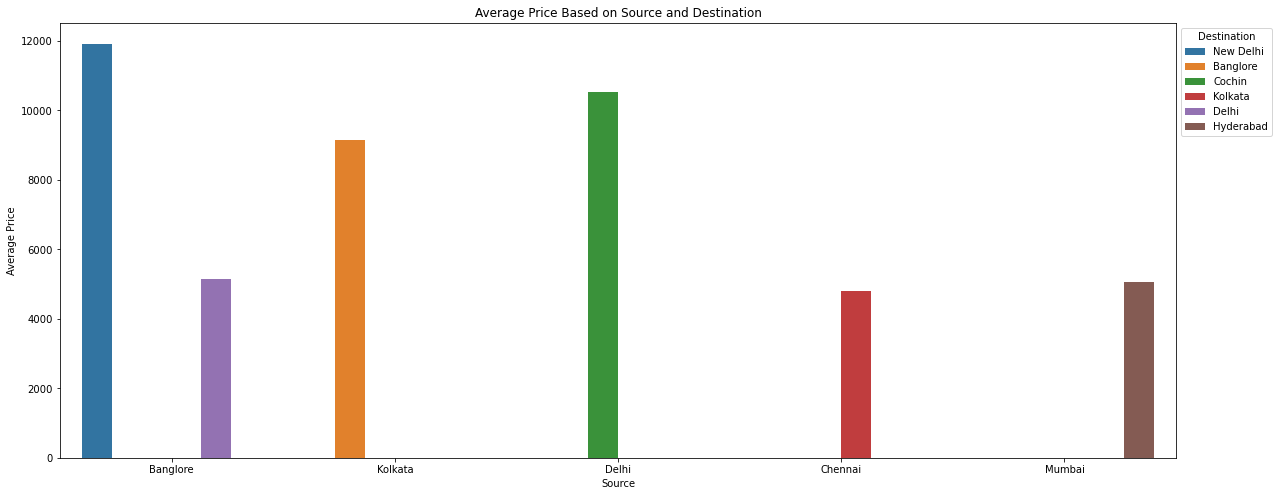

In [69]:
#Now the Flights prices may surely vary based on the Source and Destination as well 
#Let's check 
# 
plt.figure(figsize=(20, 8))

# Bar chart of average price by Source and Destination
sns.barplot(x='Source', y='Price', hue='Destination', data=df, ci=None)
plt.title('Average Price Based on Source and Destination')
plt.xlabel('Source')
plt.ylabel('Average Price')
plt.legend(title='Destination', bbox_to_anchor=(1, 1))
plt.show()

-  The flights starting from Banglore and going to New-Delhi are expensive.
- While the flights from Chennai to Kolkata are the cheapest amongs the lot, same as the Banglore to Delhi too. 


--------------------------------------------------------------------------------------------------------------------------------

##### <Center> Observations </Center>

-  Source-Destination Dynamics:

Flights originating from Banglore to New Delhi are relatively expensive, possibly due to high demand or specific route characteristics.
Contrarily, flights connecting Chennai to Kolkata and Banglore to Delhi tend to offer more budget-friendly options, potentially influenced by competition or route popularity.
-  Stop Impact on Prices:

Non-stop flights are generally more economical than those with multiple stops. Passengers seeking cost-effective options may prefer non-stop routes, while those valuing convenience might opt for direct flights.

-  Departure Time Influence:

Early morning flights emerge as a cost-effective choice, potentially attracting budget-conscious travelers.
Peak hours, particularly from 5:00 PM to 9:00 PM, coincide with higher ticket prices, indicating potential demand spikes during these periods.

##### <Center> Project Overview  </Center>
-  This Flight Price Prediction project successfully navigated through the Exploratory Data Analysis (EDA) process, employing visualizations to unravel insights from the dataset. The resulting clean data, enhanced with actionable features, lays a solid foundation for subsequent predictive modeling endeavors.

-  The insights gained from this EDA provide valuable direction for further analysis and modeling. Future steps may involve developing a predictive model leveraging machine learning algorithms to enhance the project's utility for users seeking informed decisions when booking flights. The comprehensive README file on GitHub encapsulates the project's essence, ensuring accessibility and understanding for future reference.